# Removedor de Fundo de Imagens

Além de trabalhar com textos, tanto na descrição de produtos e resenhas que visualizamos na primeira aula, nosso e-commerce também precisa lidar com imagens.

Precisamos de uma imagem para apresentar o produto no site, para atrair o interesse do cliente e incentivá-lo a comprar. Surge então uma questão interessante: as imagens geralmente têm um fundo, o que pode distrair a pessoa ao visualizar a imagem do produto.

Portanto, é comum a remoção do fundo das fotos, mas fazer isso manualmente pode ser exaustivo, além de consumir muitos recursos. Utilizando um modelo pré-treinado em inteligência artificial, podemos implementar algo que remova automaticamente os fundos das fotos, garantindo que tudo esteja com a mesma identidade, sem fundo e tornando o processo muito mais rápido. É isso que faremos agora.

## Modelo de VC.
linkn https://huggingface.co/briaai/RMBG-1.4

In [1]:
from transformers import pipeline

In [2]:
# exemplo
image_path = "https://farm5.staticflickr.com/4007/4322154488_997e69e4cf_z.jpg"

pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True)
pillow_image = pipe(image_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

MyConfig.py:   0%|          | 0.00/326 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyConfig.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


MyPipe.py:   0%|          | 0.00/2.92k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyPipe.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


briarmbg.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- briarmbg.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/176M [00:00<?, ?B/s]

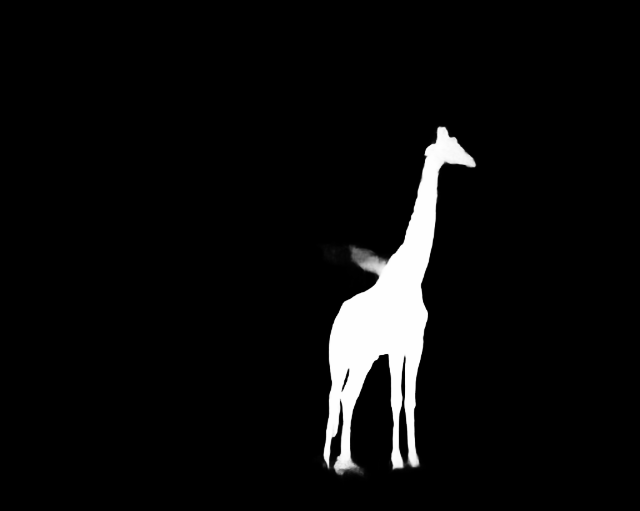

In [3]:
pillow_mask

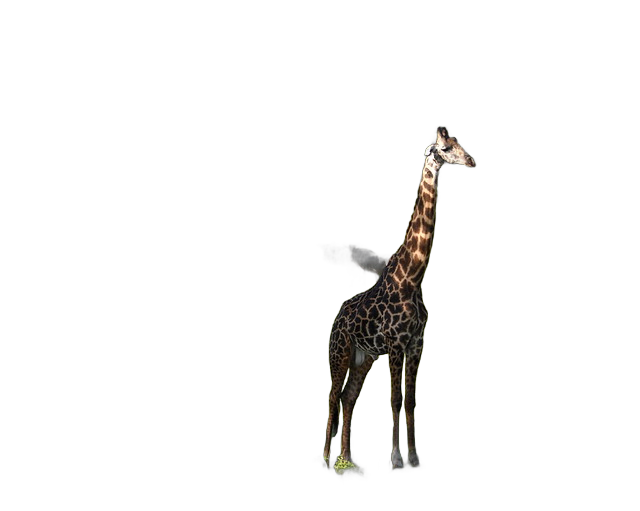

In [4]:
pillow_image

## Para nossas imagens


In [5]:
image_path = "/content/camera_fotografica.jpg" # coloque o caminho para sua imagem

pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True)
pillow_image = pipe(image_path)

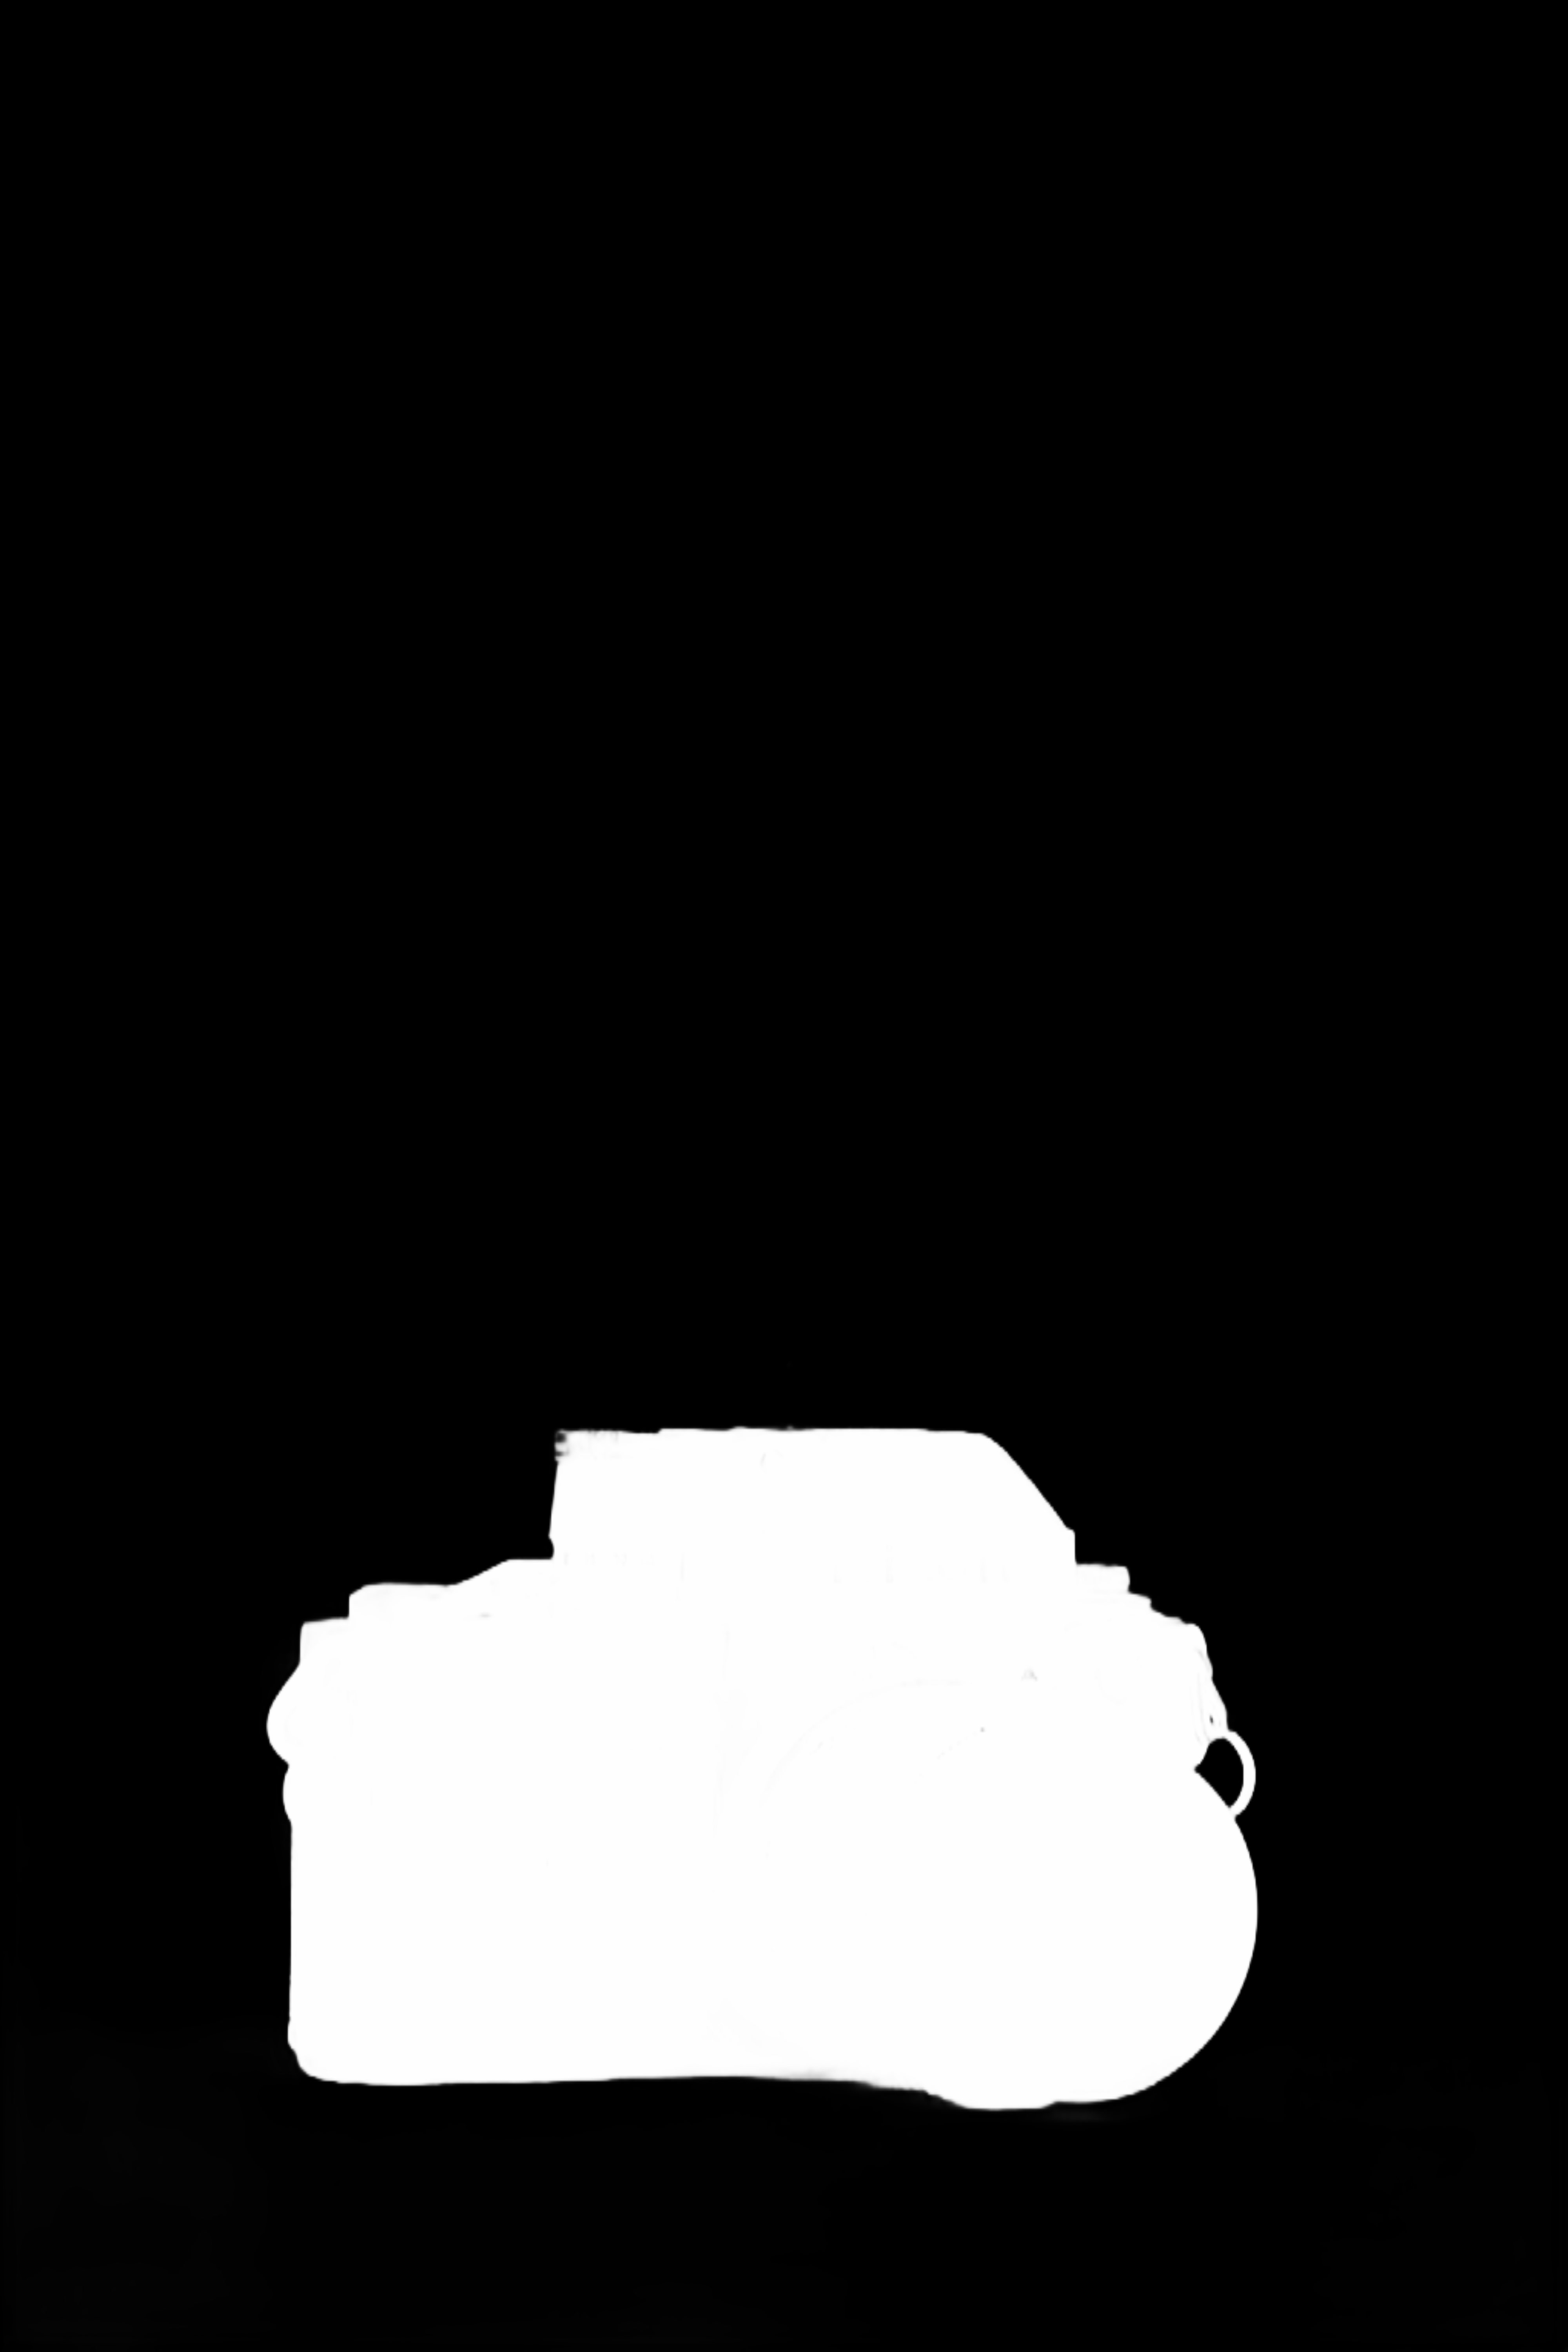

In [7]:
pillow_mask

In [8]:
pillow_image

Output hidden; open in https://colab.research.google.com to view.

# Interface Gradio

Para criar essa interface, usaremos o Hugging Face e uma biblioteca chamada Gradio, que permite criar uma aplicação com poucas linhas de código. Implementaremos essa aplicação no Google Colab.

In [ ]:
!pip install gradio -q

In [12]:
import gradio as gr
from transformers import pipeline
from PIL import Image

In [14]:
def remove_background(image):
    pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)

    # Obter a máscara da imagem
    pillow_mask = pipe(image, return_mask=True)

    # Aplicar máscara na imagem original
    pillow_image = pipe(image)

    return pillow_image

In [15]:
# Criar uma interface Gradio
app = gr.Interface(
    fn=remove_background,
    inputs=gr.components.Image(type="pil"),
    outputs=gr.components.Image(type="pil", format="png"),  # Especificar saída como PNG
    title="Remoção de Background de Imagens",
    description="Envie uma imagem e veja o background sendo removido automaticamente. A imagem resultante será no formato PNG."
)

app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9afcb437b0bf39dbf3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Spaces Huggingface